In [2]:
%matplotlib inline
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD
from sklearn.ensemble import *
from sklearn.preprocessing import normalize
import math
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix as cm
import seaborn as sn
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from itertools import combinations 

In [3]:
df_train = pd.read_csv('forest-cover-type-prediction/train.csv')
df_train.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
13549,13550,2390,173,32,90,31,537,220,235,121,...,0,0,0,0,0,0,0,0,0,3
3382,3383,2131,11,34,150,90,600,164,151,106,...,0,0,0,0,0,0,0,0,0,3
6069,6070,2388,313,17,170,31,1554,171,224,193,...,0,0,0,0,0,0,0,0,0,6
4629,4630,2298,117,11,0,0,108,238,230,121,...,0,0,0,0,0,0,0,0,0,4
6499,6500,2648,158,5,0,0,30,226,241,149,...,0,0,0,0,0,0,0,0,0,2


## Data Transformations

In [60]:
# normalization
from sklearn.preprocessing import normalize

col_normalize = ['Elevation', 'Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Roadways']
df_train_norm = df_train.copy()
df_train_norm[col_normalize] = normalize(df_train[col_normalize])
#df_train_norm['log_Horizontal_Distance_To_Roadways'] = (df_train['Horizontal_Distance_To_Roadways']+1).apply(np.log)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [48]:
np.set_printoptions(precision=5)
def score_model(model,df, return_val=False, return_train=False, display=True, return_acc=False, return_time=False, show_weights=False):
    X , Y = df.drop(columns=['Id','Cover_Type']).to_numpy(), df.Cover_Type.to_numpy()
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=.13, random_state=0)
    start = time.time()
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    acc = accuracy_score(y_val, pred)
    end = time.time()
    print('\nModel:',type(model).__name__)
    print('\tcv acc:', round(results.mean(),4))
    print('\tsplit acc:', round(acc,4))
    print('\ttime taken:', round(end-start, 4))
    if display:
        matrix = cm(y_val, pred)
        print('\t', matrix.diagonal() / matrix.sum(axis=1))

        disp = plot_confusion_matrix(model, X_val, y_val, display_labels=set(y_train), cmap=plt.cm.Blues, normalize='true')
        plt.show()
    
    if show_weights:
        for w,k in sorted(list(zip(model.feature_importances_, df.drop(columns=['Id','Cover_Type']).columns)), key=lambda x: x[0]):
            print(k,w)
            
    # return all data
    return_data = [model]
    if return_train:
        return_data += [X_train, y_train]
    if return_val:
        return_data += [X_val, y_val]
    if return_acc:
        return_data += [acc]
    if return_time:
        return_data += [end-start]
    return tuple(return_data)

# Heatmap by sub-selection of highly confounded Cover_Types

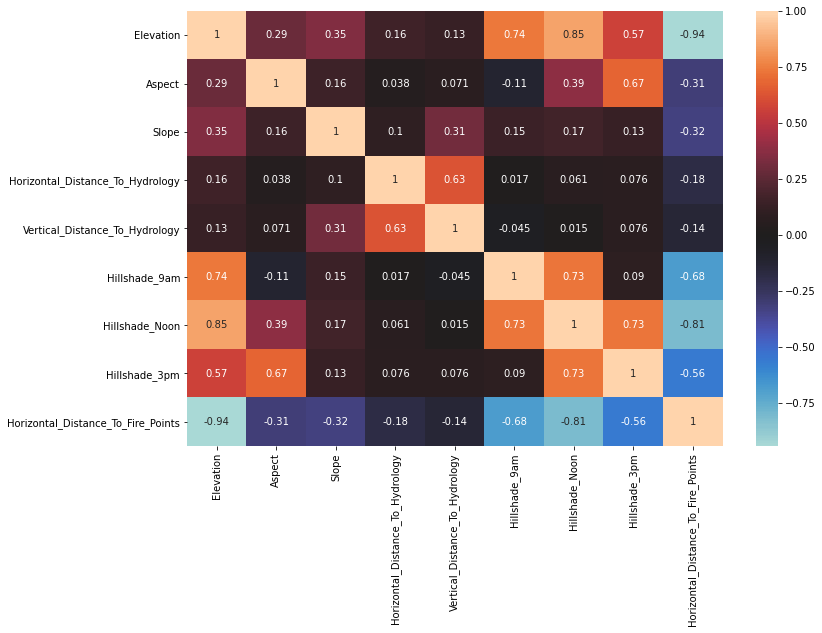

In [49]:
# looking more closely at covers 1 and 2
fig = plt.figure(1, figsize=(12, 8))
maska = df_train_norm['Cover_Type']==1
maskb = df_train_norm['Cover_Type']==2
mask = maska | maskb
small_ab_eda = df_train_norm[mask][col_normalize]
sn.heatmap(small_ab_eda.corr(), annot=True, center=0)

# ExtraTreesClassifier

ExtraTreesClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [50]:
kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)


Model: ExtraTreesClassifier
	cv acc: 0.8629
	split acc: 0.8566
	time taken: 11.4394
	 [0.73129 0.72826 0.83026 0.95374 0.96043 0.83389 0.96981]


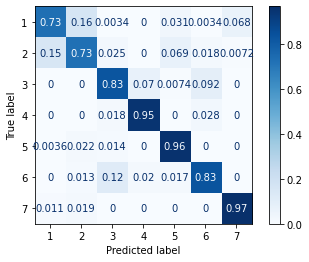

(ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False),)

In [51]:
score_model(ExtraTreesClassifier(n_jobs=-1, random_state=0),df_train_norm)

# Model for cover_types 1 and 2 only


Model: ExtraTreesClassifier
	cv acc: 0.8074
	split acc: 0.8096
	time taken: 4.8133
	 [0.81588 0.80351]


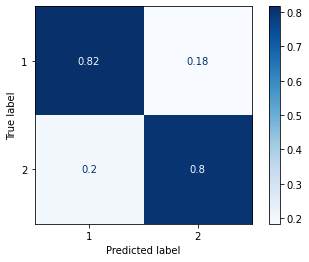

In [71]:
df_1_2 = df_train_norm[mask]
mod_1_2 = score_model(ExtraTreesClassifier(n_jobs=-1, random_state=0),df_1_2)

# PCA analysis

In [118]:
y.reset_index()

,index,Cover_Type
0,2,2
1,3,2
2,5,2
3,11,2
4,12,2
...,...,...
4315,14918,2
4316,14920,2
4317,14922,2
4318,14929,2


9 	 0.802
10 	 0.831
11 	 0.854
12 	 0.875
13 	 0.893
14 	 0.908
15 	 0.921
16 	 0.933
17 	 0.945
18 	 0.955
19 	 0.962
20 	 0.967
21 	 0.971
22 	 0.974
23 	 0.978
24 	 0.982
25 	 0.984
26 	 0.986
27 	 0.988
28 	 0.99


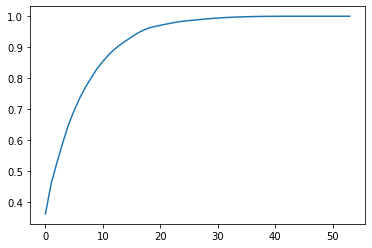

In [73]:
pca_cols = df_1_2.columns[1:-1]

# assumes that scaling/normalization has already been performed
X = df_1_2[pca_cols]
y = df_1_2.iloc[:,-1:]

pca = PCA()
pca.fit(X)

i = 1
for val in np.cumsum(pca.explained_variance_ratio_):
    if (val > .8 and val < 0.99):
        print(i, '\t', np.round(val, 3))
    i += 1

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [136]:
# chose the value where a) the rate of improvement dropped to <=1% OR we reached 95%
pca = PCA(n_components=9).fit(X)
pca.score(X)

45.820237285686446

In [137]:
df_train_pca = pd.DataFrame(pca.transform(X))
df_train_pca['Id'] = 1
y_new = y.reset_index()
df_train_pca['Cover_Type'] = y_new['Cover_Type']


Model: ExtraTreesClassifier
	cv acc: 0.7468
	split acc: 0.7544
	time taken: 3.2466
	 [0.74368 0.76491]


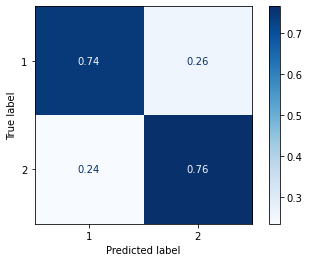

In [138]:
mod_1_2_pca = score_model(ExtraTreesClassifier(n_jobs=-1, random_state=0),df_train_pca)

# Shap analysis

In [11]:
import shap

In [12]:
explainer = shap.TreeExplainer(model=mod_1_2[0],
                              data=None,
                              model_output='raw',
                              feature_perturbation='tree_path_dependent')

In [39]:
df_train_norm.insert(len(df_train_norm.columns)-1, 'Cover_Type', df_train_norm.pop('Cover_Type'))
X_train = df_train_norm.iloc[:5,1:-1]
shap_values = explainer.shap_values(X_train[:5])

In [40]:
print(X_train[:5].shape)
print(np.array(shap_values).shape)

(5, 55)
(2, 5, 55)


In [41]:
shap.initjs()

In [42]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], features=X_train.iloc[0,:])

In [44]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:5,:], features=X_train.iloc[:5,:])